## Hierarchical Clustering

In [2]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.stats import chi2

In [3]:
#read prepared csv files into dataframe
fertilizer = pd.read_csv('fertilizers.csv', index_col=0)

In [7]:
fertilizer

,CMP Rs.,P/E,CMP / BV,PEG,EPS 12M Rs.,Debt / Eq,Current ratio,Pledged %,ROA 12M %,ROE %,ROCE %,EV / EBITDA,NPM Qtr %,GPM Qtr %,Mar Cap Rs.Cr.
Name,,,,,,,,,,,,,,,
Coromandel Inter,1015.00,17.67,4.68,0.67,57.56,0.06,1.87,0.04,15.20,26.65,34.69,11.26,8.71,24.69,29856.67
Chambal Fert.,343.10,9.35,2.23,0.26,36.67,0.66,1.60,24.20,13.23,26.39,23.35,6.88,4.69,28.59,14278.01
G N F C,687.55,5.26,1.35,0.13,130.80,0.00,3.58,0.00,17.97,24.54,33.14,3.17,21.10,39.44,10682.22
F A C T,121.35,14.54,41.47,0.49,6.96,9.70,0.98,0.00,11.55,6152.16,37.70,9.63,10.60,41.10,7845.83
R C F,104.25,7.24,1.48,0.26,14.40,0.77,1.34,0.00,6.69,16.86,15.34,5.42,6.04,19.34,5751.37
G S F C,135.35,4.86,0.46,0.30,27.83,0.00,3.36,0.00,7.11,8.54,12.58,2.77,11.62,31.18,5389.58
Paradeep Phospha,64.65,13.18,1.67,0.37,6.91,1.33,0.91,0.00,6.52,19.87,15.17,10.69,2.57,20.70,5305.77
Natl.Fertilizer,51.55,20.29,1.24,NaN,2.54,1.55,1.03,0.00,-1.03,-4.64,1.66,8.15,1.94,11.31,2531.41
M B Agro Prod.,873.50,24.72,9.32,0.66,35.33,0.80,1.51,0.00,16.21,32.15,30.14,14.82,13.46,37.28,1913.56


### Imputing Missing Values

In [4]:
fertilizer.isnull().sum()

CMP Rs.            0
P/E                3
CMP / BV           4
PEG                4
EPS 12M Rs.        0
Debt / Eq          4
Current ratio      0
Pledged %          0
ROA 12M %          0
ROE %              4
ROCE %             1
EV / EBITDA        0
NPM Qtr %          1
GPM Qtr %          1
Mar Cap Rs.Cr.     0
dtype: int64

In [5]:
#MICE Multiple Imputation by Chained Equations 
#Create Kernel
import miceforest as mf
kds=mf.ImputationKernel(
    fertilizer,
    datasets=5,
    save_all_iterations=True,
    random_state=11
)
#RUN Mice Algorithm for 11 iterations
kds.mice(11)

In [6]:
kds.complete_data(0)
data=pd.concat([kds.complete_data(i) for i in range(5)]).groupby(level=0).mean()

In [7]:
data

,CMP Rs.,P/E,CMP / BV,PEG,EPS 12M Rs.,Debt / Eq,Current ratio,Pledged %,ROA 12M %,ROE %,ROCE %,EV / EBITDA,NPM Qtr %,GPM Qtr %,Mar Cap Rs.Cr.
Name,,,,,,,,,,,,,,,
Agro Phos India,39.70,11.550,1.710,0.310,3.44,0.270,1.79,0.00,7.41,13.160,15.180,8.11,7.990,39.50,80.49
Aries Agro,139.30,14.220,0.800,1.230,11.13,0.490,1.53,0.00,2.30,5.340,13.170,5.48,5.430,52.22,181.03
Basant Agro Tech,21.95,10.140,1.300,0.360,2.16,0.480,1.36,0.00,5.79,13.180,12.660,8.45,2.880,21.14,198.92
Bharat Agri Fert,565.00,17.254,4.890,0.568,-1.97,0.380,1.40,0.00,0.52,0.840,3.260,73.18,1.540,70.81,298.63
Chambal Fert.,343.10,9.350,2.230,0.260,36.67,0.660,1.60,24.20,13.23,26.390,23.350,6.88,4.690,28.59,14278.01
Coromandel Inter,1015.00,17.670,4.680,0.670,57.56,0.060,1.87,0.04,15.20,26.650,34.690,11.26,8.710,24.69,29856.67
F A C T,121.35,14.540,41.470,0.490,6.96,9.700,0.98,0.00,11.55,6152.160,37.700,9.63,10.600,41.10,7845.83
G N F C,687.55,5.260,1.350,0.130,130.80,0.000,3.58,0.00,17.97,24.540,33.140,3.17,21.100,39.44,10682.22
G S F C,135.35,4.860,0.460,0.300,27.83,0.000,3.36,0.00,7.11,8.540,12.580,2.77,11.620,31.18,5389.58


In [8]:
data.isnull().sum()

CMP Rs.            0
P/E                0
CMP / BV           0
PEG                0
EPS 12M Rs.        0
Debt / Eq          0
Current ratio      0
Pledged %          0
ROA 12M %          0
ROE %              0
ROCE %             0
EV / EBITDA        0
NPM Qtr %          0
GPM Qtr %          0
Mar Cap Rs.Cr.     0
dtype: int64

### Standardizing Data

In [9]:
#Key financial indicators selected for experiment
financial_ratios = [ 'P/E', 'CMP / BV',
                    'PEG', 'EPS 12M Rs.',
                    'Debt / Eq', 'Current ratio',
                    'Pledged %', 'ROA 12M %','ROE %','ROCE %','EV / EBITDA','NPM Qtr %','GPM Qtr %']
data_extracted = data[financial_ratios]
data_extracted

,P/E,CMP / BV,PEG,EPS 12M Rs.,Debt / Eq,Current ratio,Pledged %,ROA 12M %,ROE %,ROCE %,EV / EBITDA,NPM Qtr %,GPM Qtr %
Name,,,,,,,,,,,,,
Agro Phos India,11.550,1.710,0.310,3.44,0.270,1.79,0.00,7.41,13.160,15.180,8.11,7.990,39.50
Aries Agro,14.220,0.800,1.230,11.13,0.490,1.53,0.00,2.30,5.340,13.170,5.48,5.430,52.22
Basant Agro Tech,10.140,1.300,0.360,2.16,0.480,1.36,0.00,5.79,13.180,12.660,8.45,2.880,21.14
Bharat Agri Fert,17.254,4.890,0.568,-1.97,0.380,1.40,0.00,0.52,0.840,3.260,73.18,1.540,70.81
Chambal Fert.,9.350,2.230,0.260,36.67,0.660,1.60,24.20,13.23,26.390,23.350,6.88,4.690,28.59
Coromandel Inter,17.670,4.680,0.670,57.56,0.060,1.87,0.04,15.20,26.650,34.690,11.26,8.710,24.69
F A C T,14.540,41.470,0.490,6.96,9.700,0.98,0.00,11.55,6152.160,37.700,9.63,10.600,41.10
G N F C,5.260,1.350,0.130,130.80,0.000,3.58,0.00,17.97,24.540,33.140,3.17,21.100,39.44
G S F C,4.860,0.460,0.300,27.83,0.000,3.36,0.00,7.11,8.540,12.580,2.77,11.620,31.18


In [29]:
#make sure consistency of the stocks group along different time window
indices= data_extracted.index.tolist()

In [11]:
data_extracted = data_extracted.loc[indices]

In [12]:
#standardization along columns
data_extracted_std=(data_extracted.loc[:, financial_ratios[0:]]-data_extracted.loc[:, financial_ratios[0:]].mean())/data_extracted.loc[:, financial_ratios[0:]].std()

### Outlier Detection

In [13]:
df=data_extracted_std
df = df.to_numpy()

In [14]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [15]:
pd.DataFrame(covariance)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.055425,0.999259,-0.115433,-0.119146,0.966666,-0.086087,-0.151104,-0.040986,-0.252071,0.863406,-0.346826,0.179197
1,-0.055425,1.000000,-0.059974,-0.062742,0.753314,-0.086482,-0.101856,0.093374,0.972429,0.362656,-0.030132,0.136412,0.137208
2,0.999259,-0.059974,1.000000,-0.108538,-0.116238,0.967197,-0.086125,-0.148812,-0.040773,-0.251730,0.857703,-0.343616,0.172951
3,-0.115433,-0.062742,-0.108538,1.000000,0.392578,-0.046516,0.001662,0.090076,-0.067373,0.258563,-0.163369,0.226978,-0.044478
4,-0.119146,0.753314,-0.116238,0.392578,1.000000,-0.190745,0.035408,-0.014269,0.782740,0.184107,-0.150152,0.101683,-0.059344
5,0.966666,-0.086482,0.967197,-0.046516,-0.190745,1.000000,-0.130563,-0.092870,-0.068635,-0.141395,0.810007,-0.205965,0.176141
6,-0.086087,-0.101856,-0.086125,0.001662,0.035408,-0.130563,1.000000,-0.298774,-0.084065,-0.226134,-0.229686,0.038101,-0.226343
7,-0.151104,0.093374,-0.148812,0.090076,-0.014269,-0.092870,-0.298774,1.000000,0.056994,0.701242,-0.143156,0.005664,-0.168380
8,-0.040986,0.972429,-0.040773,-0.067373,0.782740,-0.068635,-0.084065,0.056994,1.000000,0.306696,-0.052390,0.108471,0.086674
9,-0.252071,0.362656,-0.251730,0.258563,0.184107,-0.141395,-0.226134,0.701242,0.306696,1.000000,-0.301645,0.464762,-0.073488


In [16]:
# Distances between center point and 
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)

print('--- Observations found as outlier -----')
print(df[ distances > cutoff , :])

--- Index of Outliers ----
(array([ 6,  9, 13, 24, 25], dtype=int64),)
--- Observations found as outlier -----
[[-0.18567851  4.76413707 -0.18466093 -0.36045882  3.82372855 -0.3220806
  -0.41314219  0.25392827  4.90264577  1.46975174 -0.24031761  0.52349663
   0.43114437]
 [-0.12804195 -0.2025215  -0.16740255 -0.50652424 -0.38962731 -0.52802581
  -0.41314219 -0.86203246 -0.19825878 -1.4329119   1.56228596 -3.83495173
   3.30806536]
 [ 4.89638894 -0.31413465  4.90056726 -0.49227859 -0.55953527  4.74477723
  -0.41314219 -0.67730427 -0.21061044 -1.18897846  4.18622974 -1.67141949
   0.79306308]
 [-0.25955448 -0.26452881 -0.22660837 -0.44042441  0.01254844 -0.53408302
  -0.41314219  3.51155513 -0.18938154  0.30738723 -0.24319675 -1.92852925
  -1.37179437]
 [-0.25176755 -0.22175642 -0.22660837  4.17459693  2.69402138 -0.40991017
   0.23000188 -0.46474032 -0.17156888 -0.12014583 -0.34710754  0.18456763
  -0.27682391]]


In [17]:
cutoff

22.362032494826934

In [18]:
data_extracted_std.index[[ 6,  9, 13, 24, 25]]

Index(['F A C T', 'Indra Industries', 'M P Agro Inds.', 'Welterman Intl.',
       'Zuari Agro Chem.'],
      dtype='object', name='Name')

In [19]:
data_extracted_std.drop(['F A C T', 'Indra Industries' , 'M P Agro Inds.', 'Welterman Intl.', 'Zuari Agro Chem.'],axis=0, inplace=True)

### Dendrogram

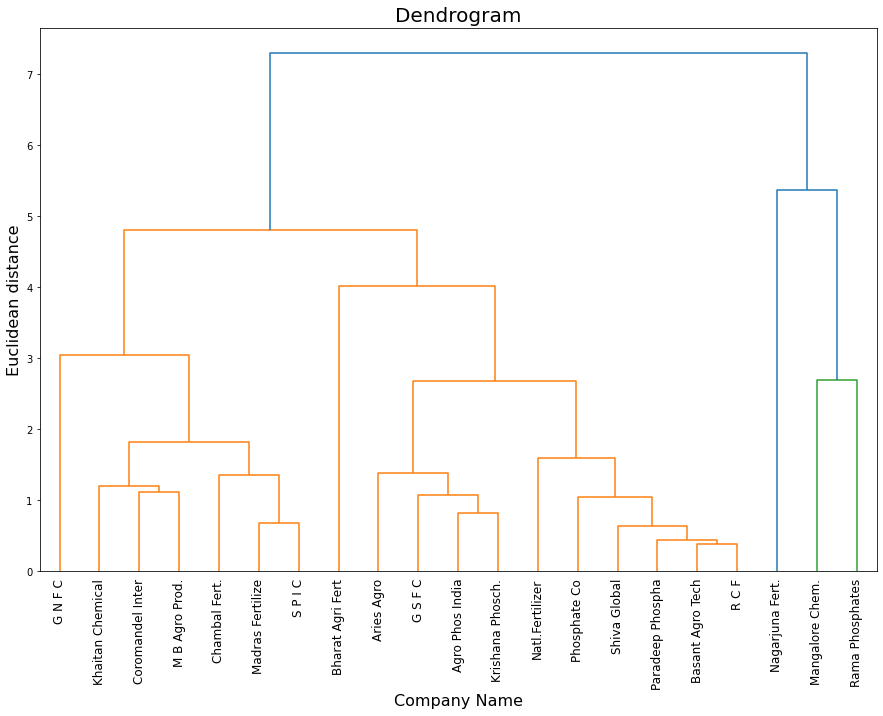

In [20]:
# Calculate the distance between each sample
Z = linkage(data_extracted_std, method='ward')
# Plot with Custom leaves
plt.figure(figsize=(15,10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12, labels=data_extracted_std.index)
plt.title("Dendrogram",size=20)
plt.xlabel("Company Name",size=16)
plt.ylabel("Euclidean distance",size=16)
plt.show()

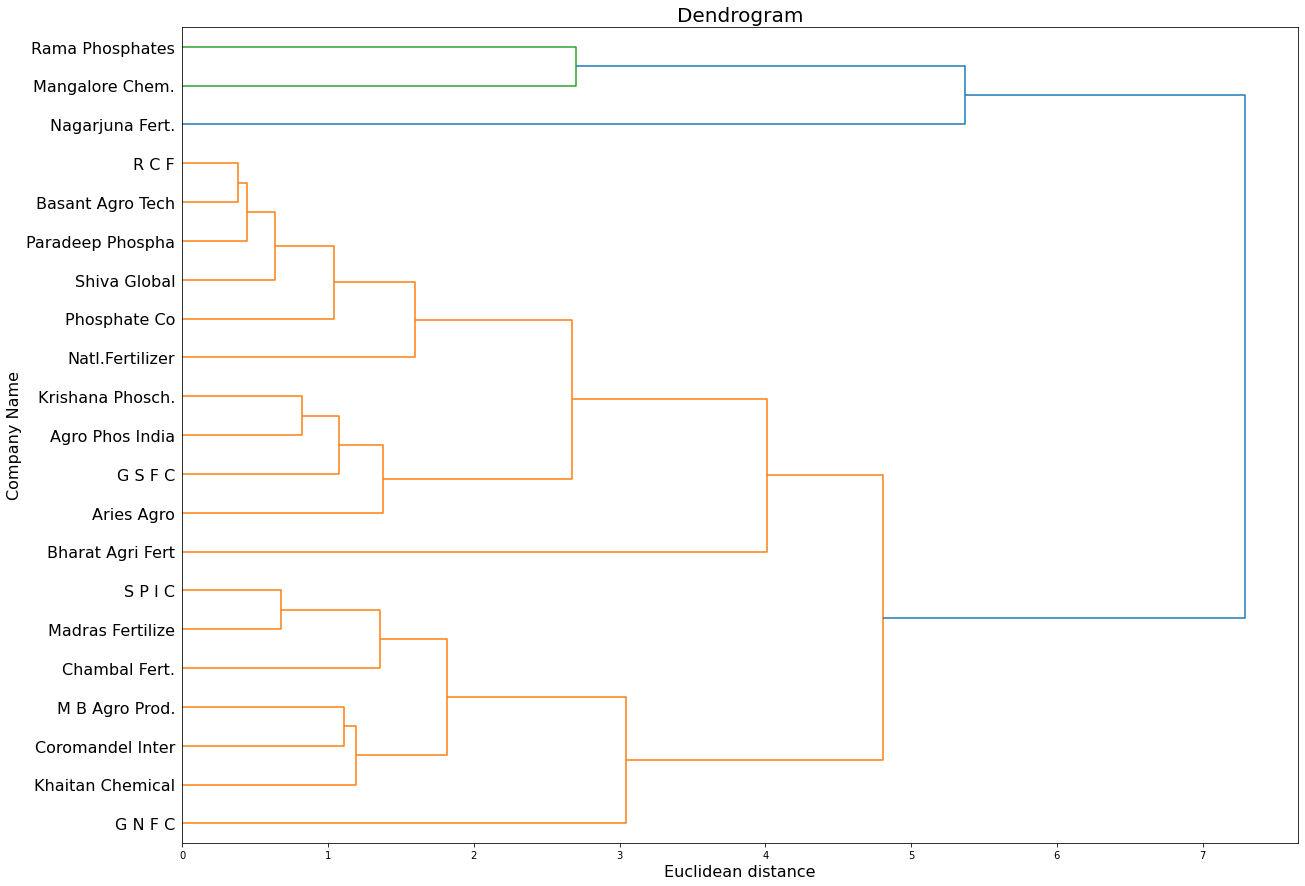

In [21]:
# Calculate the distance between each sample
Z = linkage(data_extracted_std, method='ward')
# Plot with Custom leaves
plt.figure(figsize=(20,15))
dendrogram(Z, orientation="right",leaf_rotation=0, leaf_font_size=16, labels=data_extracted_std.index)
plt.title("Dendrogram",size=20)
plt.xlabel("Euclidean distance",size=16)
plt.ylabel("Company Name",size=16)
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#K means clustering

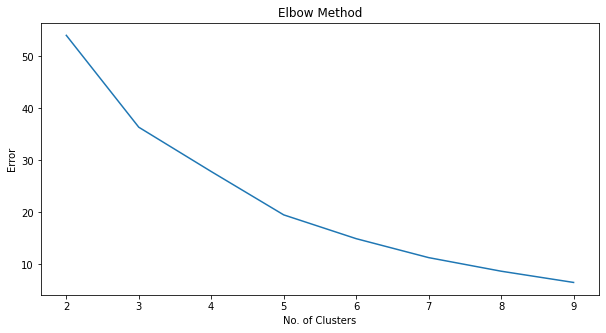

In [24]:
#Elbow Method
from sklearn.cluster import KMeans
X=data_extracted_std

error=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2,10),error)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Error")
plt.show()

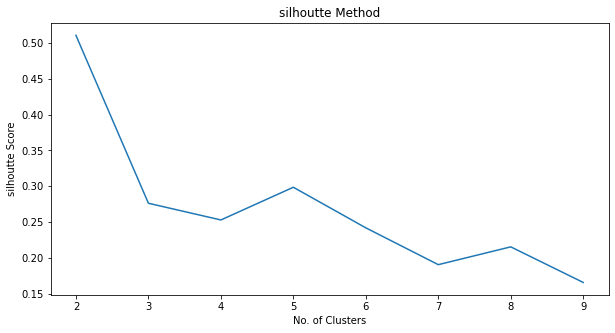

In [25]:
#silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-10
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X)
    labels = algorithm.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
plt.figure(figsize=(10,5))
plt.plot(range(2,10),sil)
plt.title("silhoutte Method")
plt.xlabel("No. of Clusters")
plt.ylabel("silhoutte Score")
plt.show() 

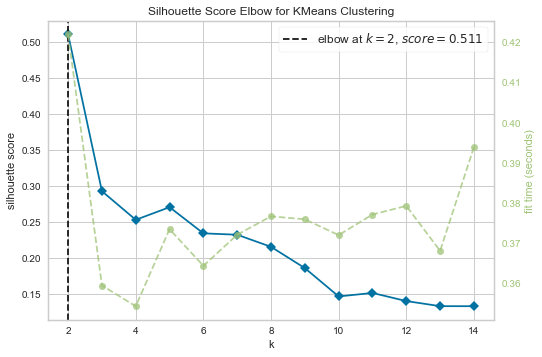

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [27]:
#so by using silhouette method,we get k=2
#There for optimal number of clusters is 2

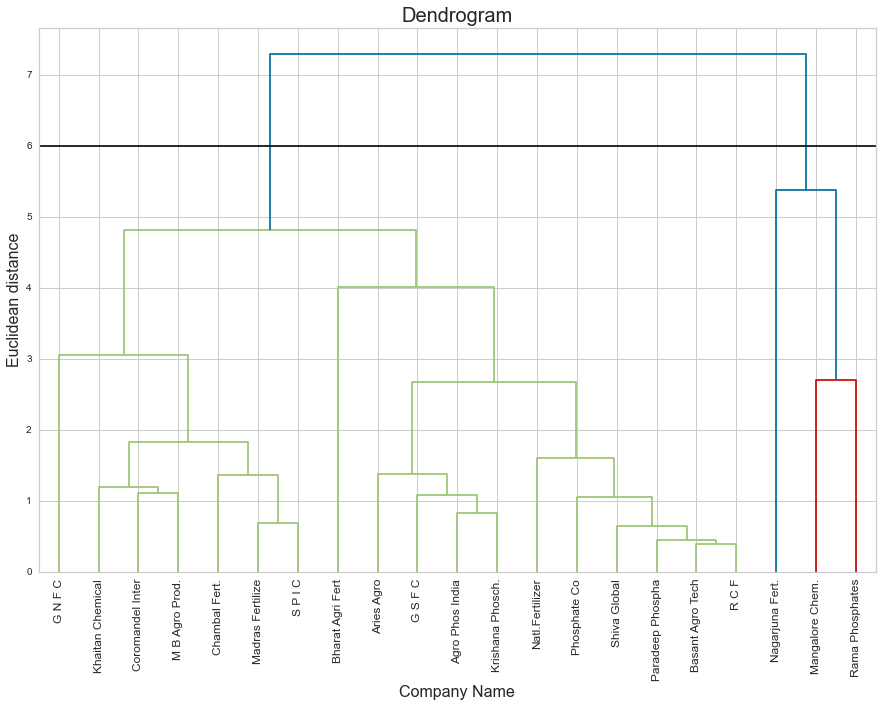

In [28]:
# Calculate the distance between each sample
Z = linkage(data_extracted_std, method='ward')
# Plot with Custom leaves
plt.figure(figsize=(15,10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12, labels=data_extracted_std.index)
plt.title("Dendrogram",size=20)
plt.xlabel("Company Name",size=16)
plt.ylabel("Euclidean distance",size=16)
plt.axhline(y=6, c='k')
plt.show()

In [ ]:
GNFC, Khaitan Chemical, Coromandel Inter, M B Agro Prod., Chambal Fert., Madras Fertilize, S P I C, Bharat Agri Fert, Aries Agro,
G S F C, Agro Phos India, Krishana Phosch., Natl.Fertilizer, Phosphate Co, Shiva Global, Paradeep Phospha, Basant Agro Tech,R C F

In [ ]:
Nagarjuna Fert, Mangalore Chem., Rama Phosphates

In [11]:
fertilizer['Name']

0     Coromandel Inter
1        Chambal Fert.
2              G N F C
3              F A C T
4                R C F
5              G S F C
6     Paradeep Phospha
7      Natl.Fertilizer
8       M B Agro Prod.
9      Mangalore Chem.
10             S P I C
11    Krishana Phosch.
12    Madras Fertilize
13    Khaitan Chemical
14    Zuari Agro Chem.
15     Rama Phosphates
16     Nagarjuna Fert.
17    Bharat Agri Fert
18    Basant Agro Tech
19          Aries Agro
20        Shiva Global
21     Agro Phos India
22        Phosphate Co
23      M P Agro Inds.
24     Welterman Intl.
25    Indra Industries
Name: Name, dtype: object

In [10]:
#read prepared csv files into dataframe
fertilizer = pd.read_csv('fertilizers.csv')